In [1]:
# Test migration history reconstruction on breast cancer data

import sys
import os

repo_dir = "/Users/divyakoyyalagunta/Desktop/Cornell_Research/Morris_Lab/met_history_prediction/"
os.chdir(repo_dir)

from src.lib import vertex_labeling

from src.util import data_extraction_util as data_util
from src.util import vertex_labeling_util as vert_util
import matplotlib
import torch

matplotlib.rcParams['figure.figsize'] = [3, 3]

HOADLEY_DATA_DIR = os.path.join(repo_dir, 'src/data/hoadley_breast_cancer_2016')
MSK_MET_FN = os.path.join(repo_dir, 'src/data/msk_met/msk_met_freq_one_met_patients.csv')
                          
HOAD_MSK_MET_MAP = {
    "liver": "Liver",
    "brain": "CNS/Brain",
    "rib": "Bone",
    "breast": "Breast",
    "kidney": "Kidney",
    "lung": "Lung",
    "adrenal": "Adrenal Gland",
    "spinal": "CNS/Brain"
}

def find_labeling(all_mut_trees_fn, ref_var_fn, custom_colors):    
    ref_matrix, var_matrix, unique_sites, cluster_label_to_idx = data_util.get_ref_var_matrices_from_real_data(ref_var_fn)
    data = data_util.get_adj_matrices_from_all_mutation_trees(all_mut_trees_fn, cluster_label_to_idx)
    print("num trees:", len(data))
    print(unique_sites)
    tree_num = 1
    for adj_matrix, pruned_cluster_label_to_idx in data:
        print(f"\nTREE {tree_num}")
        T = torch.tensor(adj_matrix, dtype = torch.float32)
        B = vert_util.get_mutation_matrix_tensor(T)
        idx_to_label = {v:str(v) for k,v in pruned_cluster_label_to_idx.items()}
        G = data_util.get_genetic_distance_tensor_from_adj_matrix(T, pruned_cluster_label_to_idx, "_")
        G=None
        primary_idx = unique_sites.index('breast')
        r = torch.nn.functional.one_hot(torch.tensor([primary_idx]), num_classes=len(unique_sites)).T
        O = data_util.get_organotropism_matrix(unique_sites, HOAD_MSK_MET_MAP, MSK_MET_FN)
        weights = vertex_labeling.Weights(data_fit=1.0, mig=3.0, comig=2.0, seed_site=1.0, reg=2.0, gen_dist=0.0, organotrop=0.0)
        print_config = vert_util.PrintConfig(visualize=True, verbose=True, viz_intermeds=False, k_best_trees=5)
        edges, vert_to_site_map, _, _, _ = vertex_labeling.gumbel_softmax_optimization(T, ref_matrix, var_matrix, B, ordered_sites=unique_sites, G=G,
                                                    O=O, weights=weights, print_config=print_config, p=r, 
                                                    node_idx_to_label=idx_to_label, batch_size=128, init_temp=30, 
                                                    final_temp=0.01, max_iter=200, custom_colors=custom_colors, 
                                                    primary="breast", lr_sched="step")
        tree_num += 1
    return edges, vert_to_site_map


/Users/divyakoyyalagunta/Desktop/Cornell_Research/Morris_Lab/met_history_prediction/src/util/vertex_labeling_util.py:446: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(len(candidates) == 1, f"{msg} root node detected")
15:24:53 INFO
NumExpr defaulting to 8 threads.


CUDA GPU: False
CUDA GPU: False
CUDA GPU: False


num trees: 2
['breast', 'adrenal', 'liver', 'lung', 'spinal']

TREE 1
Adrenal Gland not in MSK-MET as primary tumor
Adrenal Gland not in MSK-MET as primary tumor
Adrenal Gland not in MSK-MET as primary tumor
Adrenal Gland not in MSK-MET as primary tumor
Adrenal Gland not in MSK-MET as primary tumor
CNS/Brain not in MSK-MET as primary tumor
CNS/Brain not in MSK-MET as primary tumor
CNS/Brain not in MSK-MET as primary tumor
CNS/Brain not in MSK-MET as primary tumor
CNS/Brain not in MSK-MET as primary tumor


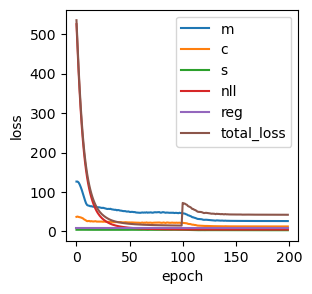

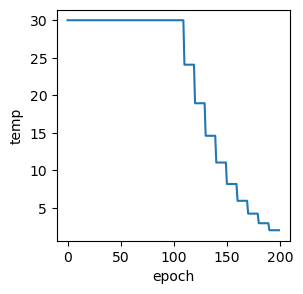

15:25:32 INFO
         norm     0     1     2     3     4     5     6     7     8
breast  0.396 0.000 0.000 0.000 0.054 0.055 0.000 0.000 0.392 0.000
adrenal 0.189 0.000 0.338 0.000 0.051 0.000 0.413 0.000 0.000 0.000
liver   0.000 0.000 0.000 0.000 0.479 0.000 0.000 0.426 0.000 0.000
lung    0.573 0.101 0.000 0.000 0.000 0.262 0.000 0.000 0.000 0.000
spinal  0.550 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.372


Time elapsed: 38.838102
**************************************** BEST TREE LABELING****************************************

Migration number: 7.0
Comigration number: 5.0
Seeding site number: 2.0
Neg log likelihood: 4.552
Reg: 5.0
Loss: 47.552


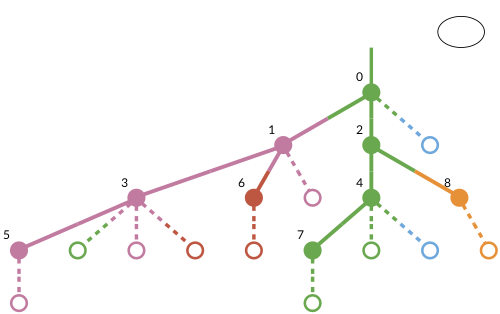

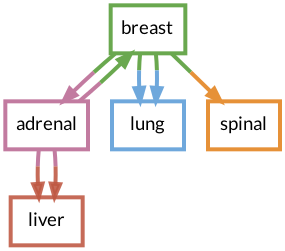

15:25:33 INFO
         norm     0     1     2     3     4     5     6     7     8
breast  0.383 0.000 0.000 0.000 0.052 0.059 0.000 0.000 0.386 0.000
adrenal 0.184 0.000 0.339 0.000 0.055 0.000 0.409 0.000 0.000 0.000
liver   0.000 0.000 0.000 0.000 0.478 0.000 0.000 0.415 0.000 0.000
lung    0.555 0.110 0.000 0.000 0.000 0.268 0.000 0.000 0.000 0.000
spinal  0.561 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.369


----------------------------------------------------------------------------------------------------

Migration number: 7.0
Comigration number: 5.0
Seeding site number: 2.0
Neg log likelihood: 4.554
Reg: 5.000000476837158
Loss: 47.554


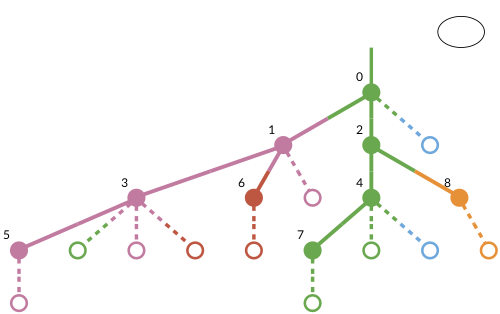

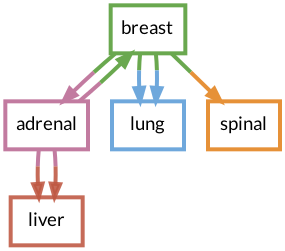

15:25:34 INFO
         norm     0     1     2     3     4     5     6     7     8
breast  0.394 0.000 0.000 0.000 0.056 0.053 0.000 0.000 0.394 0.000
adrenal 0.175 0.000 0.347 0.000 0.000 0.000 0.413 0.000 0.000 0.000
liver   0.000 0.000 0.000 0.000 0.490 0.000 0.000 0.434 0.000 0.000
lung    0.565 0.110 0.000 0.000 0.000 0.263 0.000 0.000 0.000 0.000
spinal  0.556 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.370


----------------------------------------------------------------------------------------------------

Migration number: 7.0
Comigration number: 5.0
Seeding site number: 2.0
Neg log likelihood: 4.746
Reg: 4.999999523162842
Loss: 47.746


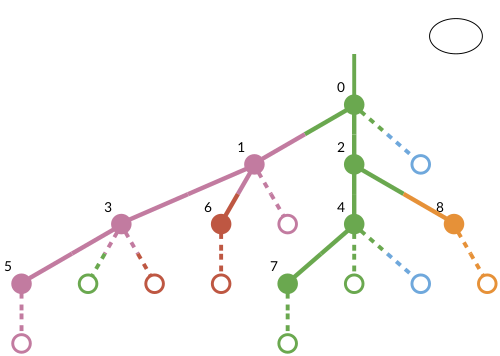

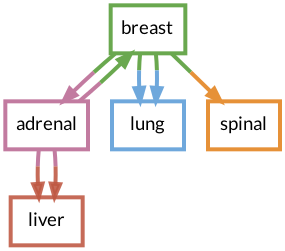

15:25:35 INFO
         norm     0     1     2     3     4     5     6     7     8
breast  0.390 0.000 0.000 0.000 0.054 0.051 0.000 0.000 0.393 0.000
adrenal 0.187 0.000 0.340 0.000 0.055 0.000 0.408 0.000 0.000 0.000
liver   0.000 0.000 0.000 0.000 0.491 0.000 0.000 0.436 0.000 0.000
lung    0.577 0.093 0.000 0.000 0.000 0.269 0.000 0.000 0.000 0.000
spinal  0.572 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.375


----------------------------------------------------------------------------------------------------

Migration number: 7.0
Comigration number: 5.0
Seeding site number: 2.0
Neg log likelihood: 4.831
Reg: 5.000000476837158
Loss: 47.831


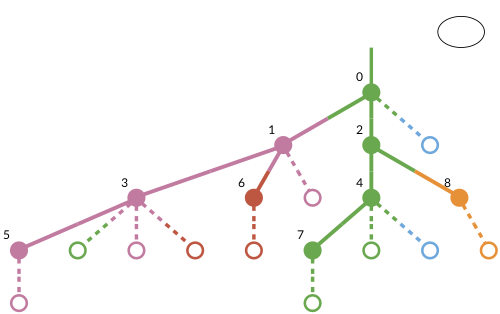

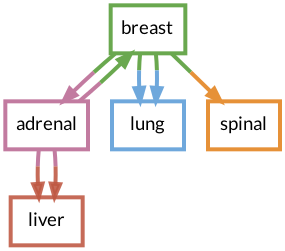

15:25:36 INFO
         norm     0     1     2     3     4     5     6     7     8
breast  0.376 0.000 0.000 0.000 0.053 0.052 0.000 0.000 0.396 0.000
adrenal 0.190 0.000 0.339 0.000 0.051 0.000 0.413 0.000 0.000 0.000
liver   0.000 0.000 0.000 0.000 0.488 0.000 0.000 0.440 0.000 0.000
lung    0.554 0.120 0.000 0.000 0.000 0.259 0.000 0.000 0.000 0.000
spinal  0.563 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.371


----------------------------------------------------------------------------------------------------

Migration number: 7.0
Comigration number: 5.0
Seeding site number: 2.0
Neg log likelihood: 4.831
Reg: 5.0
Loss: 47.831


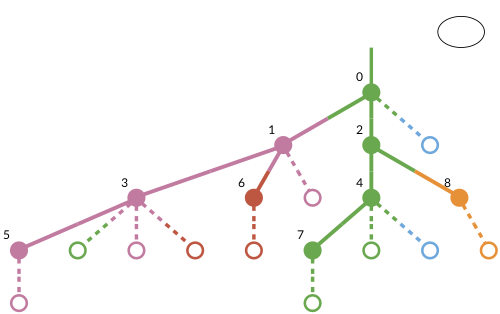

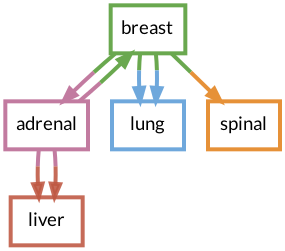

----------------------------------------------------------------------------------------------------



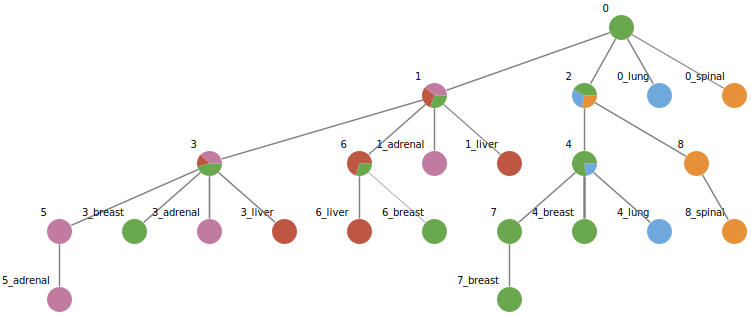


TREE 2
Adrenal Gland not in MSK-MET as primary tumor
Adrenal Gland not in MSK-MET as primary tumor
Adrenal Gland not in MSK-MET as primary tumor
Adrenal Gland not in MSK-MET as primary tumor
Adrenal Gland not in MSK-MET as primary tumor
CNS/Brain not in MSK-MET as primary tumor
CNS/Brain not in MSK-MET as primary tumor
CNS/Brain not in MSK-MET as primary tumor
CNS/Brain not in MSK-MET as primary tumor
CNS/Brain not in MSK-MET as primary tumor


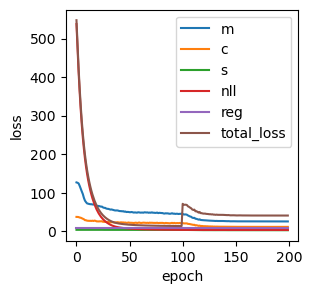

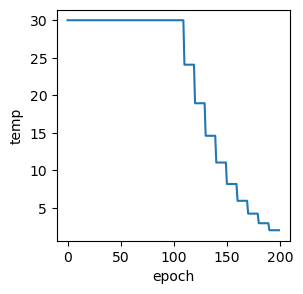

15:26:16 INFO
         norm     0     1     2     3     4     5     6     7     8
breast  0.386 0.000 0.000 0.000 0.000 0.055 0.000 0.000 0.387 0.000
adrenal 0.183 0.000 0.344 0.000 0.000 0.000 0.417 0.000 0.000 0.000
liver   0.091 0.000 0.383 0.000 0.000 0.000 0.000 0.441 0.000 0.000
lung    0.561 0.108 0.000 0.000 0.000 0.259 0.000 0.000 0.000 0.000
spinal  0.554 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.371


Time elapsed: 38.455706
**************************************** BEST TREE LABELING****************************************

Migration number: 6.0
Comigration number: 4.0
Seeding site number: 2.0
Neg log likelihood: 3.88
Reg: 5.0
Loss: 41.88


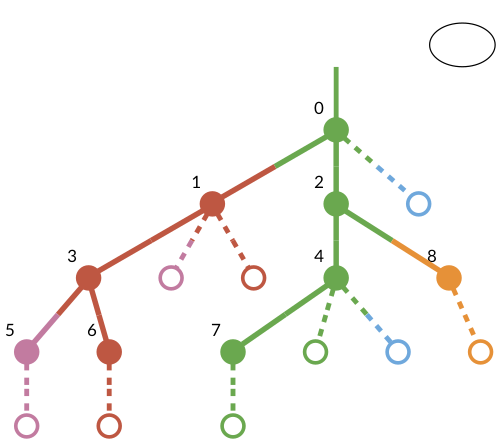

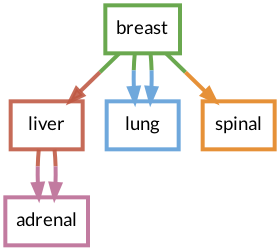

15:26:17 INFO
         norm     0     1     2     3     4     5     6     7     8
breast  0.375 0.052 0.000 0.000 0.000 0.057 0.000 0.000 0.389 0.000
adrenal 0.188 0.000 0.342 0.000 0.000 0.000 0.421 0.000 0.000 0.000
liver   0.100 0.000 0.383 0.000 0.000 0.000 0.000 0.440 0.000 0.000
lung    0.551 0.123 0.000 0.000 0.000 0.262 0.000 0.000 0.000 0.000
spinal  0.546 0.059 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.367


----------------------------------------------------------------------------------------------------

Migration number: 7.0
Comigration number: 4.0
Seeding site number: 2.0
Neg log likelihood: 3.865
Reg: 5.0
Loss: 44.865


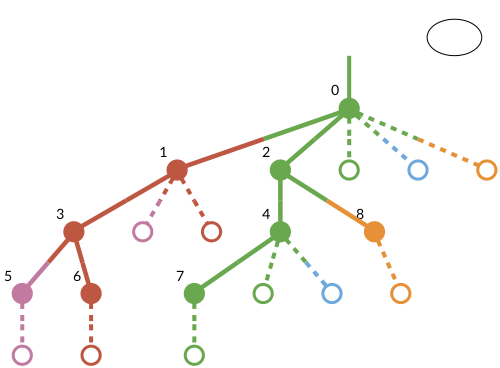

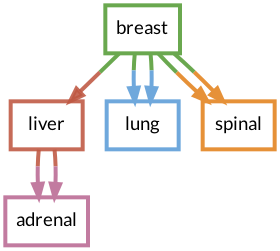

15:26:17 INFO
         norm     0     1     2     3     4     5     6     7     8
breast  0.376 0.052 0.000 0.000 0.000 0.052 0.000 0.000 0.392 0.000
adrenal 0.189 0.000 0.341 0.000 0.000 0.000 0.421 0.000 0.000 0.000
liver   0.090 0.000 0.385 0.000 0.000 0.000 0.000 0.441 0.000 0.000
lung    0.556 0.119 0.000 0.000 0.000 0.262 0.000 0.000 0.000 0.000
spinal  0.539 0.062 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.371


----------------------------------------------------------------------------------------------------

Migration number: 7.0
Comigration number: 4.0
Seeding site number: 2.0
Neg log likelihood: 3.889
Reg: 5.0
Loss: 44.889


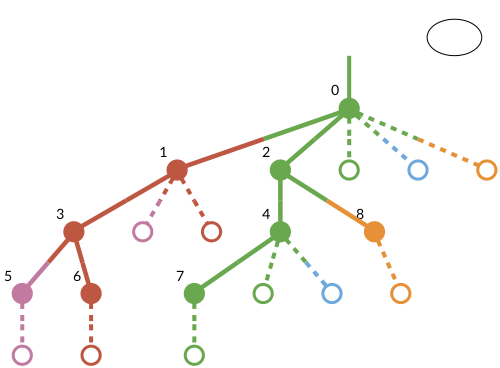

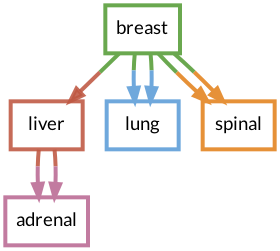

15:26:18 INFO
         norm     0     1     2     3     4     5     6     7     8
breast  0.377 0.056 0.000 0.000 0.000 0.056 0.000 0.000 0.386 0.000
adrenal 0.178 0.000 0.343 0.000 0.000 0.000 0.426 0.000 0.000 0.000
liver   0.099 0.000 0.383 0.000 0.050 0.000 0.000 0.441 0.000 0.000
lung    0.555 0.119 0.000 0.000 0.000 0.265 0.000 0.000 0.000 0.000
spinal  0.531 0.076 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.366


----------------------------------------------------------------------------------------------------

Migration number: 7.0
Comigration number: 4.0
Seeding site number: 2.0
Neg log likelihood: 3.918
Reg: 5.000000476837158
Loss: 44.918


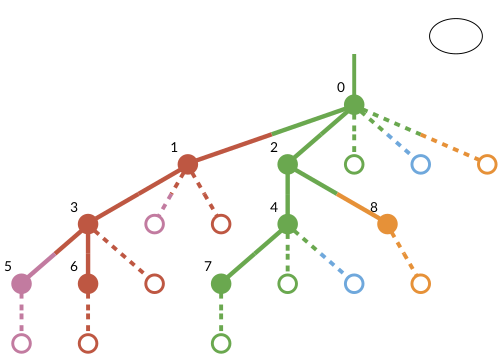

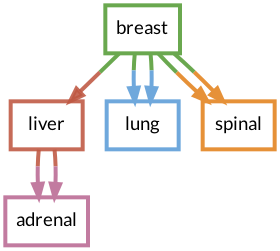

15:26:19 INFO
         norm     0     1     2     3     4     5     6     7     8
breast  0.374 0.053 0.000 0.000 0.000 0.060 0.000 0.000 0.387 0.000
adrenal 0.187 0.000 0.344 0.000 0.000 0.000 0.420 0.000 0.000 0.000
liver   0.097 0.000 0.386 0.000 0.000 0.000 0.000 0.441 0.000 0.000
lung    0.572 0.099 0.000 0.000 0.000 0.262 0.000 0.000 0.000 0.000
spinal  0.549 0.057 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.365


----------------------------------------------------------------------------------------------------

Migration number: 7.0
Comigration number: 4.0
Seeding site number: 2.0
Neg log likelihood: 3.934
Reg: 4.999999523162842
Loss: 44.934


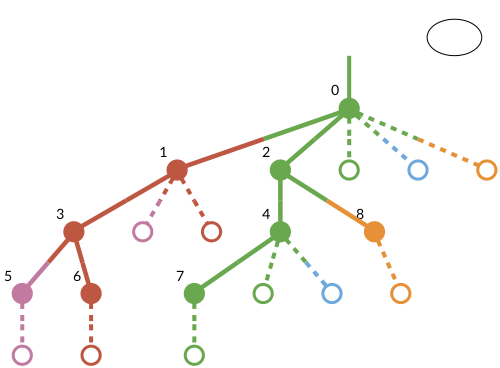

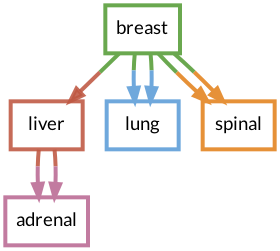

----------------------------------------------------------------------------------------------------



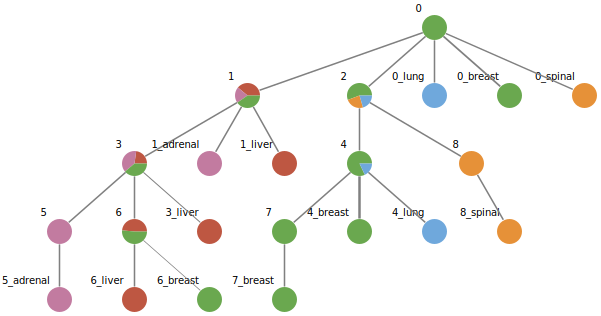

([('0', '1'),
  ('0', '2'),
  ('0', '0_lung'),
  ('1', '3'),
  ('1', '1_adrenal'),
  ('1', '1_liver'),
  ('2', '4'),
  ('2', '8'),
  ('3', '5'),
  ('3', '6'),
  ('4', '7'),
  ('4', '4_breast'),
  ('4', '4_lung'),
  ('5', '5_adrenal'),
  ('6', '6_liver'),
  ('7', '7_breast'),
  ('8', '8_spinal')],
 {'0': 'breast',
  '1': 'liver',
  '2': 'breast',
  '3': 'liver',
  '4': 'breast',
  '5': 'adrenal',
  '6': 'liver',
  '7': 'breast',
  '8': 'spinal',
  '4_breast': 'breast',
  '7_breast': 'breast',
  '1_adrenal': 'adrenal',
  '5_adrenal': 'adrenal',
  '1_liver': 'liver',
  '6_liver': 'liver',
  '0_lung': 'lung',
  '4_lung': 'lung',
  '8_spinal': 'spinal'})

In [2]:
# Patient A1, SPRUCE trees
custom_colors = [matplotlib.colors.to_hex(c) for c in ['green', 'red', 'royalblue', 'darkorange', 'purple']]
custom_colors = ["#6aa84fff","#c27ba0ff", "#be5742e1", "#6fa8dcff", "#e69138ff", "#9e9e9eff"]

find_labeling(os.path.join(HOADLEY_DATA_DIR, "A1/A1_SPRUCE_trees.txt"), os.path.join(HOADLEY_DATA_DIR, "A1/A1_0.95.tsv"), custom_colors)


In [ ]:
# Patient A7, SPRUCE trees
custom_colors = [matplotlib.colors.to_hex(c) for c in ['limegreen', 'hotpink', 'saddlebrown', 'royalblue', 'darkorange', 'grey']]
custom_colors = ["#6aa84fff","#c27ba0ff", "#be5742e1", "#2496c8ff", "#e69138ff", "#674ea7ff"]

edges, vert_to_site_map = find_labeling(os.path.join(HOADLEY_DATA_DIR, "A7/A7_SPRUCE_trees.txt"), os.path.join(HOADLEY_DATA_DIR, "A7/A7_0.95.tsv"), custom_colors)

print("edges", edges)

In [ ]:
# metastatic subclone selection analysis of A7
ref_var_fn = os.path.join(HOADLEY_DATA_DIR, "A7/A7_0.95.tsv")
ref_matrix, var_matrix, unique_sites, cluster_label_to_idx = data_util.get_ref_var_matrices_from_real_data(ref_var_fn)
print(unique_sites)

vaf_matrix = var_matrix / (var_matrix + ref_matrix)
purity = 0.95 # from Hoadley paper, is this right? probably need to re-estimate
mult = 1.0 # assume number of chromosomal copies that carry the mutation is 1.0
local_cn = 2.0 # assume local CN is 2 for now
ccf_matrix = ((vaf_matrix/(mult*purity))*((purity*local_cn) + (2*(1-purity)))).numpy()
ccf_matrix

In [ ]:
import numpy as np
# 0 = absent, 1 = subclonal, 2 = clonal
clonality_matrix = np.where(((ccf_matrix <= 0.5) & (ccf_matrix > 0.1)), 1, 0)
clonality_matrix = np.where((ccf_matrix > 0.5), 2, clonality_matrix)
clonality_matrix

In [ ]:
import pandas as pd
clonality_data = []
label_map = {0:"Absent", 1:"Subclonal", 2:"Clonal"}
num_subclones = clonality_matrix.shape[1]
for i in range(num_subclones):
    subclone_col = clonality_matrix[:,i]
    clonality_data.append([i]+[label_map[k] for k in subclone_col])

site_labels = [f"{site.capitalize()} Primary" if i == 0 else f"{site.capitalize()} Metastasis" for i, site in enumerate(unique_sites)]
clonality_df = pd.DataFrame(clonality_data, columns=["Subclone"]+site_labels)
clonality_df


In [ ]:
# we call mutations with CCF>0.5 as clonal mutations, mutations with CCF<=0.5 and CCF>0.1 are subclonal
# breast vs. liver
from matplotlib import pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(2, 3, figsize=(15, 8), constrained_layout=True)
y = "Breast Primary"

c = 1
for i in [0,1]:
    for j in [0,1,2]:
        if c == len(clonality_df.columns): break
        x = clonality_df.columns[c]
        print(x)

        ax = sns.swarmplot(ax=axes[i,j], data=clonality_df, x=x, y=y, 
                           order=["Absent", "Subclonal", "Clonal"], size=10, 
                           hue="Subclone")
        sns.despine(offset=0, trim=True)
        ax.set_xlabel(x, fontsize=11)
        ax.set_ylabel(y, fontsize=11)
        ax.get_legend().remove()
        # there is only one axes for this plot; provide an alias for ease of use
#         ax.set_yticks(["Absent", "Subclonal", "Clonal"])
        # get the ytick locations for each name
        point_locs = []
        for path in ax.collections:
            point_locs.append(path.get_offsets())
            #print(path.get_label())

        point_locs = [list(item) for sublist in point_locs for item in sublist]
        c += 1
fig.suptitle(f"Metastasizing Clones", x=0.33, y=0.95, horizontalalignment='left', verticalalignment='top', fontsize=14, fontweight='bold')
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=num_subclones)
    # for i, point_loc in enumerate(point_locs):
    #     ax.text(point_loc[0], point_loc[1]+0.05, str(i))
    # for i in range(num_subclones):
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.75)


In [ ]:
U_clip = [[0.4769335091114044, 0.5134045481681824, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.3397281765937805, 0.0, 0.0, 0.0, 0.2556871175765991, 0.0, 0.0, 0.0, 0.0, 0.0, 0.36632010340690613], [0.5697565078735352, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.40199223160743713, 0.0, 0.0], [0.1478603333234787, 0.0, 0.0, 0.06622103601694107, 0.0, 0.400208055973053, 0.0, 0.0, 0.0, 0.3738396167755127, 0.0], [0.3028472065925598, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.593723714351654, 0.0, 0.0, 0.0], [0.27643024921417236, 0.0, 0.0, 0.0, 0.0, 0.0, 0.7042533159255981, 0.0, 0.0, 0.0, 0.0]]
sites = ['breast', 'brain', 'kidney', 'liver', 'lung', 'rib']
prevalence_df = pd.DataFrame(U_clip, columns=["norm"] + [str(i) for i in range(len(U_clip[0])-1)], index=sites)
prevalence_df=prevalence_df.stack().reset_index().rename(columns={'level_0':'sample_id','level_1':'clone_id', 0:'clonal_prev'})
prevalence_df


In [ ]:
edges= [("norm", "0"), ('0', '1'), ('0', '3'), ('1', '2'), ('1', '5'), ('2', '4'), ('3', '6'), ('3', '9'), ('4', '7'), ('4', '8')]
tree_df = pd.DataFrame(edges, columns=["source", "target"])
tree_df


In [ ]:
x_coords = [205, 293, 440, 244, 405, 290]
y_coords = [660, 126, 835, 806, 624, 450]
sample_locs = pd.DataFrame([sites, sites, x_coords, y_coords]).T
sample_locs.columns = ["sample_id", "location_id", "x", "y"]
sample_locs

In [ ]:
sample_locs.to_csv(os.path.join(HOADLEY_DATA_DIR, "A7", "sample_locs.csv"), index=False)
tree_df.to_csv(os.path.join(HOADLEY_DATA_DIR, "A7","tree_df.csv"), index=False)
prevalence_df.to_csv(os.path.join(HOADLEY_DATA_DIR, "A7", "prevalence_df.csv"), index=False)

In [ ]:
HOADLEY_DATA_DIR

In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R -i prevalence_df
library(mapscape)
hoadley_dir<-"/Users/divyakoyyalagunta/Desktop/Cornell_Research/Morris_Lab/met_history_prediction/src/data/hoadley_breast_cancer_2016/A7/"
# clonal prevalences
clonal_prev <- read.csv(file.path(hoadley_dir, "prevalence_df.csv"))
print(clonal_prev)
# locations of each tumour sample on user-provided image
sample_locations <- read.csv(file.path(hoadley_dir, "sample_locs.csv"))
# genotype tree edges
tree_edges <- read.csv(file.path(hoadley_dir, "tree_df.csv"))
# image reference
img_ref <- file.path(hoadley_dir, "anatomical_sites.png")
# radial order of samples
sample_ids <- c('breast', 'brain', 'kidney', 'liver', 'lung', 'rib')
# run mapscape
mapscape(clonal_prev = clonal_prev, tree_edges = tree_edges, sample_locations = sample_locations, 
img_ref = img_ref,show_warnings=TRUE)

# library(mapscape)
# hoadley_dir <- "/Users/divyakoyyalagunta/Desktop/Cornell_Research/Morris_Lab/met_history_prediction/src/data/hoadley_breast_cancer_2016/A7"
# mapscape(clonal_prev = prevalence_df, tree_edges=tree_df, sample_locations=sample_locs, img_ref=file.path(hoadley_dir, "anatomical_sites.png"))


In [ ]:
%%R -i prevalence_df
library(mapscape)
